Import dependencies

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [20]:
df = df.drop(["SepalLengthCm","SepalWidthCm"],axis=1)

In [21]:
df

,Id,PetalLengthCm,PetalWidthCm,Species
0,1,1.4,0.2,Iris-setosa
1,2,1.4,0.2,Iris-setosa
2,3,1.3,0.2,Iris-setosa
3,4,1.5,0.2,Iris-setosa
4,5,1.4,0.2,Iris-setosa
...,...,...,...,...
145,146,5.2,2.3,Iris-virginica
146,147,5.0,1.9,Iris-virginica
147,148,5.2,2.0,Iris-virginica
148,149,5.4,2.3,Iris-virginica


Text(0, 0.5, 'Petal_width')

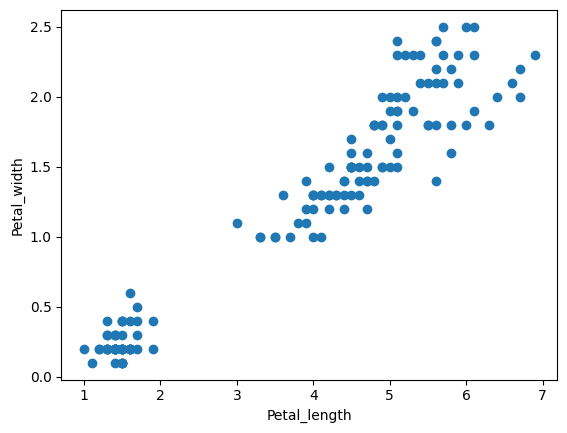

In [22]:
plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'])

plt.xlabel("Petal_length")
plt.ylabel("Petal_width")

Here we can see the data points and we came to a conclusion of two clusters

In [23]:
from sklearn.cluster import KMeans

In [24]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['PetalLengthCm','PetalWidthCm']])
y_predicted

c:\Users\jeyar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
df['cluster'] = y_predicted

In [26]:
df

,Id,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,1.4,0.2,Iris-setosa,1
1,2,1.4,0.2,Iris-setosa,1
2,3,1.3,0.2,Iris-setosa,1
3,4,1.5,0.2,Iris-setosa,1
4,5,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...
145,146,5.2,2.3,Iris-virginica,0
146,147,5.0,1.9,Iris-virginica,0
147,148,5.2,2.0,Iris-virginica,0
148,149,5.4,2.3,Iris-virginica,0


In [27]:
km.cluster_centers_

array([[4.92525253, 1.68181818],
       [1.49411765, 0.26078431]])

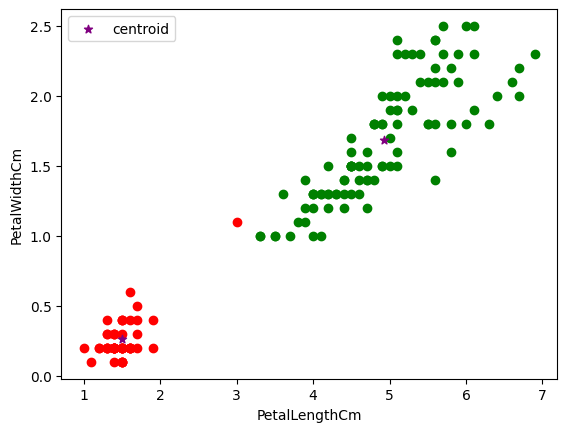

In [29]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
plt.scatter(df1.PetalLengthCm,df1['PetalWidthCm'],color='green')
plt.scatter(df2.PetalLengthCm,df2['PetalWidthCm'],color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.legend()

As we use two cluster the data points are so cluncy 

In [31]:
sse = []
k_range = range(1,10)
for i in k_range:
    km = KMeans(n_clusters=i)
    km.fit(df[['PetalLengthCm','PetalWidthCm']])
    sse.append(km.inertia_)

c:\Users\jeyar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jeyar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jeyar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jeyar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

So here we are using **eblow metheod** to find the optimal value of k

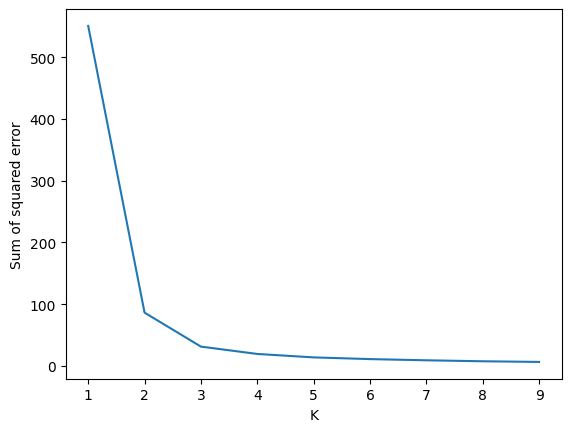

In [32]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)

So from here we conclude that dataset has 3 cluster

In [33]:
km = KMeans(n_clusters=3)
y_predicted1 = km.fit_predict(df[['PetalLengthCm','PetalWidthCm']])
y_predicted1

c:\Users\jeyar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [35]:
df = df.drop('cluster',axis=1)

In [36]:
df

,Id,PetalLengthCm,PetalWidthCm,Species
0,1,1.4,0.2,Iris-setosa
1,2,1.4,0.2,Iris-setosa
2,3,1.3,0.2,Iris-setosa
3,4,1.5,0.2,Iris-setosa
4,5,1.4,0.2,Iris-setosa
...,...,...,...,...
145,146,5.2,2.3,Iris-virginica
146,147,5.0,1.9,Iris-virginica
147,148,5.2,2.0,Iris-virginica
148,149,5.4,2.3,Iris-virginica


In [37]:
df['cluster'] = y_predicted1

In [38]:
df

,Id,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,1.4,0.2,Iris-setosa,1
1,2,1.4,0.2,Iris-setosa,1
2,3,1.3,0.2,Iris-setosa,1
3,4,1.5,0.2,Iris-setosa,1
4,5,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...
145,146,5.2,2.3,Iris-virginica,0
146,147,5.0,1.9,Iris-virginica,0
147,148,5.2,2.0,Iris-virginica,0
148,149,5.4,2.3,Iris-virginica,0


In [39]:
df.cluster.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [40]:
km.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.464     , 0.244     ],
       [4.26923077, 1.34230769]])

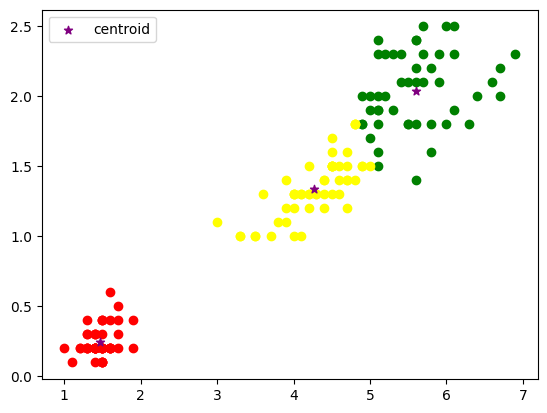

In [41]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.PetalLengthCm,df1['PetalWidthCm'],color='green')
plt.scatter(df2.PetalLengthCm,df2['PetalWidthCm'],color='red')
plt.scatter(df3.PetalLengthCm,df3['PetalWidthCm'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

Finally here we are not using any scaler method because our data is perfect and the clusters are made perfectly here